<h1>Creazione serie storica decessi COVID-19 confermati

In [39]:
import pandas as pd
decessi_covid = pd.read_csv('../csv/decessi_covid19_30giugno.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [40]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [41]:
ts_decessi_covid = decessi_covid.deceduti

<h1> Creazione serie storica decessi 7357 comuni 

In [42]:
df = pd.read_csv('../csv/serie_storica.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2508
1,2015-01-02,2079
2,2015-01-03,2107
3,2015-01-04,2135
4,2015-01-05,2199


In [43]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.TOTALE = pd.to_numeric(df.TOTALE)

In [44]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-23']
df_covid_period.head()

,DATA,TOTALE
1880,2020-02-24,1955
1881,2020-02-25,1919
1882,2020-02-26,1875
1883,2020-02-27,1777
1884,2020-02-28,1854


In [45]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-02-24,1955
2020-02-25,1919
2020-02-26,1875
2020-02-27,1777
2020-02-28,1854


In [46]:
ts_covid_period = df_covid_period.TOTALE

<h1> Creazione serie storica predizione modello ARIMA

In [47]:
predictions = pd.read_csv('../csv/predictions_daily_ARIMA_7357comuni.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
0,2015-01-01,1698.808196
1,2015-01-02,2466.318940
2,2015-01-03,2186.500175
3,2015-01-04,2127.426945
4,2015-01-05,2135.376004


In [48]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-01,1698.808196
1,2015-01-02,2466.318940
2,2015-01-03,2186.500175
3,2015-01-04,2127.426945
4,2015-01-05,2135.376004


In [49]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1659.460599
1881,2020-02-25,1659.937025
1882,2020-02-26,1660.407682
1883,2020-02-27,1660.872640
1884,2020-02-28,1661.331969


In [50]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1659.460599
2020-02-25,1659.937025
2020-02-26,1660.407682
2020-02-27,1660.872640
2020-02-28,1661.331969


In [51]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h1> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/06/2020 
    

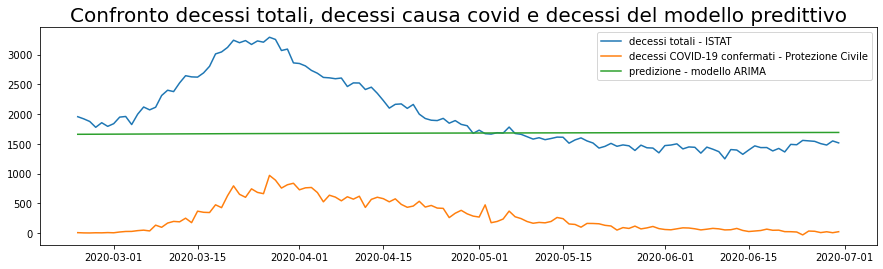

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=20)
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(ts_decessi_covid, label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')

plt.legend()
plt.show()

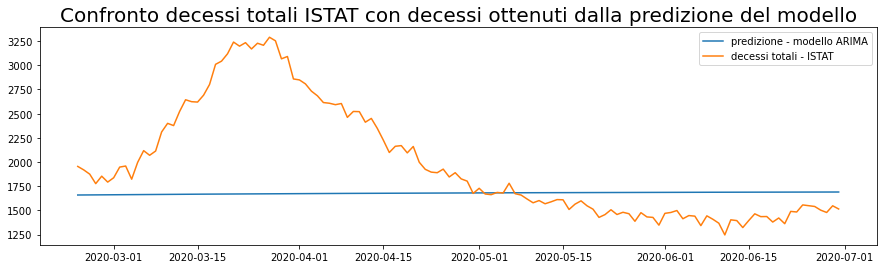

In [53]:
plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali ISTAT con decessi ottenuti dalla predizione del modello', size=20)
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

<h1>Calcolo dei decessi COVID-19 secondo il modello predittivo

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello ARIMA.

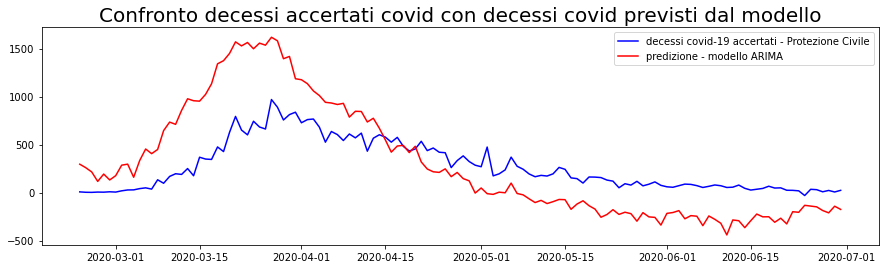

In [54]:
n = ts_covid_period - ts_predictions_covid_period 

plt.figure(figsize=(15,4))
plt.title('Confronto decessi accertati covid con decessi covid previsti dal modello', size=20)
plt.plot(ts_decessi_covid, color='blue', label='decessi covid-19 accertati - Protezione Civile')
plt.plot(n, color='red', label='predizione - modello ARIMA')
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 dal 24/02/2020 al 30/06/2020

In [55]:
m = ts_decessi_covid.sum()
print(int(m))

34767


<h3>Numero totale dei decessi COVID-19 previsti dal modello ARIMA dal 24/02/2020 al 30/06/2020</h3>

In [56]:
total = n.sum()
print(int(total))

38536


<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo ARIMA dal 24/02/2020 al 30/06/2020

In [57]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

3769
